# Introduction to Kaggle




[Kaggle](https://www.kaggle.com/) is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

In this mission and the ones that follow, we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

- Approach a Kaggle competition
- Explore the competition data and learn about the competition topic
- Prepare data for machine learning
- Train a model
- Measure the accuracy of your model
- Prepare and make your first Kaggle submission.

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which [passengers survived the sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.

Each Kaggle competition has two key data files that you will work with - a **training set** and a **testing set**.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, **Survival**.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1ESRBXN3nOU5H3_WxljfLiDBjfXdgzyfM">

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

[In this competition](https://www.kaggle.com/c/titanic/data), the two files are named **test.csv** and **train.csv**. We'll start by using the pandas library to read both files and inspect their size.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Use **pandas.read_csv()** to import **train.csv** and **test.csv**. Assign them to the variables **train** and **test** respectively.
- Use **DataFrame.shape** to calculate the number of rows and columns in **train** and **test**. Assign the results to **train_shape** and **test_shape** respectively.


In [31]:
# put your code here
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploring the Data




The files we read in the previous screen are available on [the data page for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a **data dictionary**, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- **PassengerID** - A column added by Kaggle to identify each row and make submissions easier
- **Survived** - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- **Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- **Sex** - The passenger's sex
- **Age** - The passenger's age in years
- **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
- **Parch** - The number of parents or children the passenger had aboard the Titanic
- **Ticket** - The passenger's ticket number
- **Fare** - The fare the passenger paid
- **Cabin** - The passenger's cabin number
- **Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.

The first 5 rows of the data is below:


In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.

This indicates that **Age**, **Sex**, and **PClass** may be good predictors of survival. We'll start by exploring **Sex** and **Pclass** by visualizing the data.

Because the **Survived** column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use **DataFrame.pivot_table()** to easily do this:




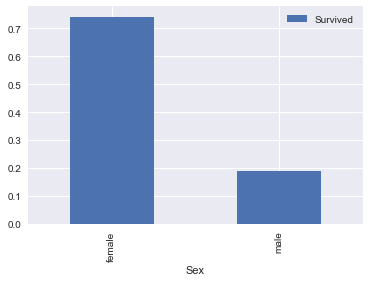

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

We can immediately see that females survived in much higher proportions than males did.

Let's do the same with the **Pclass** column.

**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Use **DataFrame.pivot_table()** to pivot the **train** dataframe:
  - Use **"Pclass"** for the **index** parameter.
  - Use **"Survived"** for the **values** parameter.
- Use **DataFrame.plot.bar()** to plot the **pivot** table.

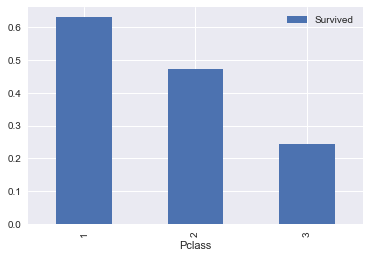

In [33]:
# put your code here
train.pivot_table(index="Pclass", values="Survived").plot.bar()


# Exploring and Converting the Age Column




The **Sex** and **PClass** columns are what we call **categorical** features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).

Let's take a look at the **Age** column using Series.describe(). You can run this code for yourself in the console, if you wish.

In [34]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
train.Age.isnull().sum()

177

The **Age** column contains numbers ranging from 0.42 to 80.0 (If you look at Kaggle's data page, it informs us that Age is fractional if the passenger is less than one). The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:

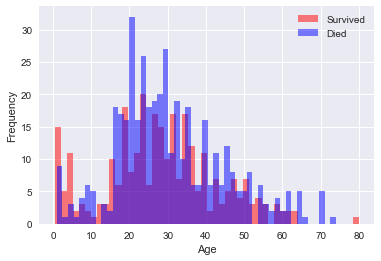

In [36]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.xlabel("Age")
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the [pandas.cut() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) to help us out.

The **pandas.cut()** function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter **labels**, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the **train** data, we also need to make to the **test** data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

In the example below, we create a function that:

- uses the [pandas.fillna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html) method to fill all of the missing values with -0.5
- cuts the **Age** column into three segments: **Missing**, **Child**, and **Adult** using pandas.cut().

We then use that function on both the train and test dataframes.

```python
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],
                                  cut_points,
                                  labels=label_names)
    return df
cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
```

The diagram below shows how the function converts the data:

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1VkewwdxQNg_kYS9lkFCRxldlcI6uORHS">

Note that the **cut_points** list has one more element than the **label_names** list, since it needs to define the upper boundary for the last segment.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Create the **cut_points** and **label_names** lists to split the **Age** column into six categories:
  - **Missing**, from -1 to 0
  - **Infant**, from 0 to 5
  - **Child**, from 5 to 12
  - **Teenager**, from 12 to 18
  - **Young Adult**, from 18 to 35
  - **Adult**, from 35 to 60
  - **Senior**, from 60 to 100
- Apply the **process_age()** function on the **train** dataframe, assigning the result to **train**.
- Apply the **process_age()** function on the **test** dataframe, assigning the result to **test.**
- Use **DataFrame.pivot_table()** to pivot the **train** dataframe by the **Age_categories** column.
- Use **DataFrame.plot.bar()** to plot the pivot table.

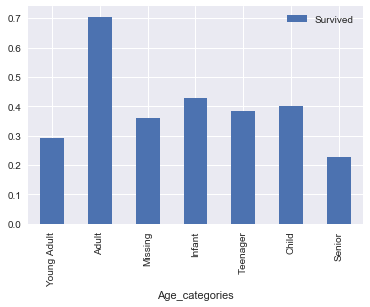

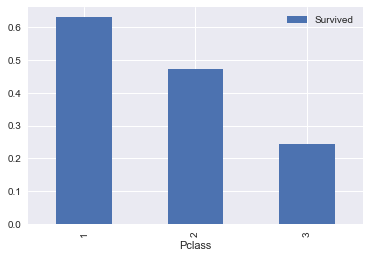

In [41]:
# put your code here
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],
                                  cut_points,
                                  labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

train.pivot_table(index="Age_categories", values="Survived").plot.bar()
train.pivot_table(index="Pclass", values="Survived").plot.bar()


# Preparing our Data for Machine Learning




So far we have identified three columns that may be useful for predicting survival:

- **Sex**
- **Pclass**
- **Age**, or more specifically our newly created **Age_categories**

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the **Pclass** column, we know they are 1, 2, and 3. You can confirm this by running the following code in your console:

In [42]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create **dummy columns** for each unique value in **Pclass**:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1mJhXisviXzGYN-rPwHKeoR32qgYRMJC-">

Rather than doing this manually, we can use the [**pandas.get_dummies()**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function, which will generate columns shown in the diagram above.

The following code creates a function to create the dummy columns for the **Pclass** column and add it back to the original dataframe. It then applies that function the **train** and **test** dataframes.

```python
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],
                             prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
```

Let's use that function to create dummy columns for both the **Sex** and **Age_categories** columns.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



- Use the **create_dummies()** function to create dummy variables for the **Sex** column:
  - in the **train** dataframe.
  - in the **test** dataframe.
- Use the **create_dummies()** function to create dummy variables for the **Age_categories** column:
  - in the **train** dataframe.
  - in the **test** dataframe.

In [43]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

# put your code here
train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,1,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,0


# Creating Our First Machine Learning Model




Now that our data has been prepared, we are ready to train our first model. The first model we will use is called **Logistic Regression**, which is often the first model you will train when performing classification.

We will be using the [scikit-learn](http://scikit-learn.org/stable/index.html) library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

- Instantiate (or create) the specific machine learning model you want to use
- Fit the model to the training data
- Use the model to make predictions
- Evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the [LogisticRegression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We'll start by looking at the first two steps. First, we need to import the class:

```python
from sklearn.linear_model import LogisticRegression
```


Next, we create a LogisticRegression object:

```python
lr = LogisticRegression()
```

Lastly, we use the [**LogisticRegression.fit() method**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) to train our model. The **.fit()** method accepts two arguments: X and Y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

```python
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])
```

The code above fits (or trains) our **LogisticRegression model** using three columns: **Pclass_2**, **Pclass_3**, and **Sex_male**.

Let's train our model using all of the columns we created in the previous screen.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Instantiate a **LogisticRegression** object called **lr**.
- Use **LogisticRegression.fit()** to fit the model on the **train** dataset using:
  - The columns contained in **columns** as the first (X) parameter.
  - The **Survived** column as the second (y) parameter.


In [46]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

# put your code here
lr = LogisticRegression()
lr.fit(X=train[columns], y=train["Survived"])



C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Splitting Our Trainning Data




Congratulations, you've trained the first machine learning model! Our next step is to find out how accurate our model is, and to do that, we'll have to make some predictions.

If you recall from earlier, we do have a **test** dataframe that we could use to make predictions. We could make predictions on that data set, but because it doesn't have the **Survived** column we would have to submit it to Kaggle to find out our accuracy. This would quickly become a pain if we had to submit to find out the accuracy every time we optimized our model.

We could also fit and predict on our **train** dataframe, however if we do this there is a high likelihood that our model will **overfit**, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

Instead we can split our **train** dataframe into two:

- One part to train our model on (often 80% of the observations)
- One part to make predictions with and test our model (often 20% of the observations)

The convention in machine learning is to call these two parts **train** and **test**. This can become confusing, since we already have our **test** dataframe that we will eventually use to make predictions to submit to Kaggle. To avoid confusion, from here on, we're going to call this Kaggle 'test' data **holdout** data, which is the technical name given to this type of data used for final predictions.

The scikit-learn library has a [handy model_selection.train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function that we can use to split our data. **train_test_split()** accepts two parameters, X and y, which contain all the data we want to train and test on, and returns four objects: **train_X**, **train_y**, **test_X**, **test_y**:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=12lermQWApWq5kmvM0HOYW0eUzIqCIQ8u">

Here's what the syntax for creating these four objects looks like:

```python
from sklearn.model_selection import train_test_split
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
all_X = train[columns]
all_y = train['Survived']
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)
```    
    
You'll notice that there are two other parameters we used: **test_size**, which lets us control what proportions our data are split into, and **random_state**. The **train_test_split()** function randomizes observations before dividing them, and setting a [random seed](https://en.wikipedia.org/wiki/Random_seed) means that our results will be reproducible, which is important if you are collaborating, or need to produce consistent results each time (which our answer checker requires).


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Use the **model_selection.train_test_split()** function to split the **train** dataframe using the following parameters:
  - **test_size** of 0.2.
  - **random_state** of 0.
- Assign the four returned objects to **train_X**, **test_X**, **train_y**, and **test_y**.

In [52]:
# put your code here
from sklearn.model_selection import train_test_split
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
all_X = train[columns]
all_y = train["Survived"]
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=.2, random_state=0)


# Making Predictions and Measuring their Accuracy




Now that we have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the [LogisticRegression.predict()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) method to make predictions.

The **predict()** method takes a single parameter X, a two dimensional array of features for the observations we wish to predict. X must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

```python
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
```

There are a number of ways to measure the accuracy of machine learning models, but when competing in Kaggle competitions you want to make sure you use the same method that Kaggle uses to calculate accuracy for that specific competition.

In this case, the evaluation section for the [Titanic competition on Kaggle](https://www.kaggle.com/c/titanic#evaluation) tells us that our score calculated as "the percentage of passengers correctly predicted". This is by far the most common form of accuracy for binary classification.

As an example, imagine we were predicting a small data set of five observations.

| Our model's prediction | The actual value | Correct |
|------------------------|------------------|---------|
| 0                      | 0                | Yes     |
| 1                      | 0                | No      |
| 0                      | 1                | No      |
| 1                      | 1                | Yes     |
| 1                      | 1                | Yes     |

In this case, our model correctly predicted three out of five values, so the accuracy based on this prediction set would be 60%.

Again, scikit-learn has a handy function we can use to calculate accuracy: [metrics.accuracy_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). The function accepts two parameters, **y_true** and **y_pred**, which are the actual values and our predicted values respectively, and returns our accuracy score.

```python
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
```

Let's put all of these steps together, and get our first accuracy score.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Instantiate a new **LogisticRegression()** object, **lr**.
- Fit the model using **train_X** and **train_y**.
- Make predictions using **test_X** and assign the results to **predictions**.
- Use **accuracy_score()** to compare **test_y** and **predictions**, assigning the result to **accuracy**.
- Print the **accuracy** variable.

In [56]:
# put your code here
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions) 
accuracy

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7877094972067039

# Using Cross Validation for More Accurate Error Measurement




Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1OeHu0TsBs5ziP1xhe_evRpAyiiFjyS8w">

The most common form of cross validation, and the one we will be using, is called **k-fold** cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. In the diagram above, we have illustrated k-fold validation where k is 5.

We will use scikit-learn's [model_selection.cross_val_score()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) function to automate the process. The basic syntax for **cross_val_score()** is:

```python
cross_val_score(estimator, X, y, cv=None)
```

- estimator is a scikit-learn estimator object, like the LogisticRegression() objects we have been creating.
- X is all features from our data set.
- y is the target variables.
- cv specifies the number of folds.

The function returns a numpy ndarray of the accuracy scores of each fold.

It's worth noting, the **cross_val_score()** function can use a variety of cross validation techniques and scoring types, but it defaults to k-fold validation and accuracy scores for our input types.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Instantiate a new **LogisticRegression()** object, **lr**.
- Use **model_selection.cross_val_score()** to perform cross-validation on our data and assign the results to **scores**:
  - Use the newly created **lr** as the estimator.
  - Use **all_X** and **all_y** as the input data.
  - Specify 10 folds to be used.
- Use the **numpy.mean()** function to calculate the **mean** of scores and assign the result to **accuracy**.
- Print the variables **scores** and **accuracy**.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# put your code here

# Making Predictions on Unseen Data




From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

As it happens, our average accuracy score was 80.2%, which is not far from the 81.0% we got from our simple train/test split, however this will not always be the case, and you should always use cross-validation to make sure the error metrics you are getting from your model are accurate.

We are now ready to use the model we have built to train our final model and then make predictions on our unseen holdout data, or what Kaggle calls the 'test' data set.


In [ ]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()

lr.fit(all_X,all_y)

holdout_predictions = lr.predict(holdout[columns])

# Creating a Submission File




The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the [Titanic competition evaluation page](https://www.kaggle.com/c/titanic#evaluation):

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| 894         | 0        |

We will need to create a new dataframe that contains the **holdout_predictions** we created in the previous screen and the **PassengerId** column from the **holdout** dataframe. We don't need to worry about matching the data up, as both of these remain in their original order.

To do this, we can pass a dictionary to the pandas.DataFrame() function:

>```python
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
```

Finally, we'll use the [DataFrame.to_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) method to save the dataframe to a CSV file. We need to make sure the index parameter is set to **False**, otherwise we will add an extra column to our CSV.

In [ ]:
holdout_ids = holdout["PassengerId"]

submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)

# Making Our First Submission to Kaggle




Now that we have our submission file, we can start our submission to Kaggle by clicking the blue 'Submit Predictions' button on the [competition page](https://www.kaggle.com/c/titanic).

You will then be prompted to upload your CSV file, and add a brief description of your submission. When you make your submission, Kaggle will process your predictions and give you your accuracy for the holdout data and your ranking. When it is finished processing you will see our first submission gets an accuracy score of 0.75598, or 75.6%.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1y8Uc0SObGxDoP8ZdmWX_FDtnm8xkmJCY">


The fact that our accuracy on the holdout data is 75.6% compared with the 80.2% accuracy we got with cross-validation indicates that our model is overfitting slightly to our training data.

At the time of writing, accuracy of 75.6% gives a rank of 8,008 out of 9,164. It's easy to look at Kaggle leaderboards after your first submission and get discouraged, but keep in mind that this is just a starting point.

It's also very common to see a small number of scores of 100% at the top of the Titanic leaderboard and think that you have a long way to go. In reality, anyone scoring about 90% on this competition is likely cheating (it's easy to look up the names of the passengers in the holdout set online and see if they survived).

There is a great analysis on Kaggle, [How am I doing with my score](https://www.kaggle.com/pliptor/how-am-i-doing-with-my-score/notebook), which uses a few different strategies and suggests a minimum score for this competition is 62.7% (achieved by presuming that every passenger died) and a maximum of around 82%. We are a little over halfway between the minimum and maximum, which is a great starting point.

# Next Steps




There are many things we can do to improve the accuracy of our model. Here are some that we will cover in the next sections of this course:

- Improving the features:
    - Feature Engineering: Create new features from the existing data.
    - Feature Selection: Select the most relevant features to reduce noise and overfitting.
- Improving the model:
    - Model Selection: Try a variety of models to improve performance.
    - Hyperparameter Optimization: Optimize the settings within each particular machine learning model.